## Dataset Explanation

This dataset contains demographic and employment information for individuals. It includes the following columns:

- **age:** Age of the individual.
- **workclass:** Type of employment.
- **fnlwgt:** Final weight, a measure used in census data sampling.
- **education:** Highest level of education achieved.
- **education-num:** Numeric representation of education level.
- **marital-status:** Marital status of the individual.
- **occupation:** Type of occupation.
- **relationship:** Relationship status.
- **race:** Ethnicity or race of the individual.
- **sex:** Gender of the individual.
- **capital-gain:** Capital gains recorded.
- **capital-loss:** Capital losses recorded.
- **hours-per-week:** Hours worked per week.
- **native-country:** Country of origin.
- **income:** Income level (target variable).

## Summary Statistics

- Total entries: 36,631
- Missing values: Workclass (724), Occupation (726), Native Country (196)

### Problem Statement

The goal of this machine learning project is to build a classification model that predicts the income level of individuals based on their demographic and employment features. The 'income' column is the target variable, and it appears to be a binary classification problem where the income is categorized as either above a certain threshold or not.

### Objective

Develop a machine learning model that accurately predicts whether an individual's income is above or below a certain threshold based on the provided features. Evaluate the model's performance using appropriate classification metrics and fine-tune as needed.

### Evaluation Metrics

We will use suitable metrics for binary classification, such as accuracy, precision, recall, F1 score

In [1]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization
import warnings  # Warnings library to manage warnings during execution

# Ignore warning messages for cleaner output
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline


## Gather and Understand Data

**Load the dataset**

In [2]:
# Read data from an Excel file ('Income Train.xlsx') and store it in a DataFrame (df)
df = pd.read_excel('Income Train.xlsx')

**Display the first few rows of the dataset**

In [3]:
# Display the first few rows of the DataFrame to get an overview of the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,18,Private,128538,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
1,36,Private,112271,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,1902,40,United-States,>50K.
2,35,Private,111387,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1579,40,United-States,<=50K
3,55,Private,118993,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,10,United-States,<=50K
4,35,?,317780,Some-college,10,Never-married,?,Unmarried,Black,Female,0,0,40,United-States,<=50K


**Display basic information about the dataset**

In [4]:
# Display basic information about the DataFrame, including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36631 entries, 0 to 36630
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36631 non-null  int64 
 1   workclass       35907 non-null  object
 2   fnlwgt          36631 non-null  int64 
 3   education       36631 non-null  object
 4   education-num   36631 non-null  int64 
 5   marital-status  36631 non-null  object
 6   occupation      35905 non-null  object
 7   relationship    36631 non-null  object
 8   race            36631 non-null  object
 9   sex             36631 non-null  object
 10  capital-gain    36631 non-null  int64 
 11  capital-loss    36631 non-null  int64 
 12  hours-per-week  36631 non-null  int64 
 13  native-country  36435 non-null  object
 14  income          36631 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.2+ MB


**Display summary statistics**

In [5]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,36631.000000,3.663100e+04,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.693265,1.896834e+05,10.094729,1114.312495,87.078922,40.438426
std,13.707549,1.055186e+05,2.569319,7631.756080,402.171549,12.401653
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175090e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781600e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377130e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Check for missing values**

In [6]:
# Check and count the number of missing values in each column of the DataFrame
df.isnull().sum()

age                 0
workclass         724
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        726
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    196
income              0
dtype: int64

**Unique values in categorical columns**

In [7]:
for column in df.select_dtypes(include='object').columns:
    # Print the unique values in the current column
    print("\033[1m" + column.upper() + ":\033[0m")  # \033[1m starts bold, \033[0m resets formatting
    print(f"Unique values in {column}: {df[column].unique()}")
    print()


WORKCLASS:
Unique values in workclass: ['Private' '?' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc' 'State-gov'
 'Federal-gov' nan 'Without-pay' 'Never-worked']

EDUCATION:
Unique values in education: ['11th' 'Bachelors' 'Some-college' 'HS-grad' 'Assoc-voc' '5th-6th' '9th'
 'Assoc-acdm' 'Prof-school' '10th' '7th-8th' 'Masters' 'Doctorate' '12th'
 '1st-4th' 'Preschool']

MARITAL-STATUS:
Unique values in marital-status: ['Never-married' 'Married-civ-spouse' 'Separated' 'Divorced' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']

OCCUPATION:
Unique values in occupation: ['Sales' 'Tech-support' 'Handlers-cleaners' 'Exec-managerial' '?'
 'Adm-clerical' 'Farming-fishing' 'Machine-op-inspct' 'Craft-repair'
 'Other-service' 'Prof-specialty' 'Transport-moving' nan 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces']

RELATIONSHIP:
Unique values in relationship: ['Own-child' 'Husband' 'Unmarried' 'Not-in-family' 'Other-relative' 'Wife']

RACE:
Unique values in race: ['White' 'Black' 'Amer

## EDA & Feature Engineering 

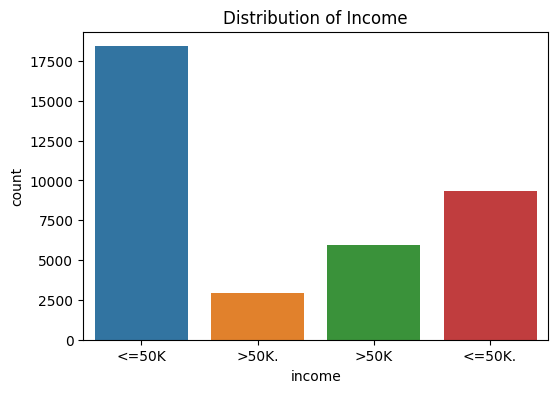

In [8]:
# Visualize the distribution of the target variable (income)
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()

**Analysis of the 'income' Column**

The 'income' column in the dataset appears to have some inconsistencies in the categories, as there are two similar categories for each income level, one ending with a period and the other without. These inconsistencies may need to be addressed to ensure accurate analysis.

After examining the data, it seems that the 'income' values can be standardized by removing the trailing periods. This would result in two main categories:

- **<=50K:** 27,785 entries (combining '<=50K' and '<=50K.')
- **>50K:** 8,846 entries (combining '>50K' and '>50K.')

This would resolve the duplicate entries and provide a more accurate representation of the income distribution in the dataset.

In [9]:
# Remove trailing periods from the 'income' column
df['income'] = df['income'].str.strip('.')
print(df['income'].value_counts())

income
<=50K    27785
>50K      8846
Name: count, dtype: int64


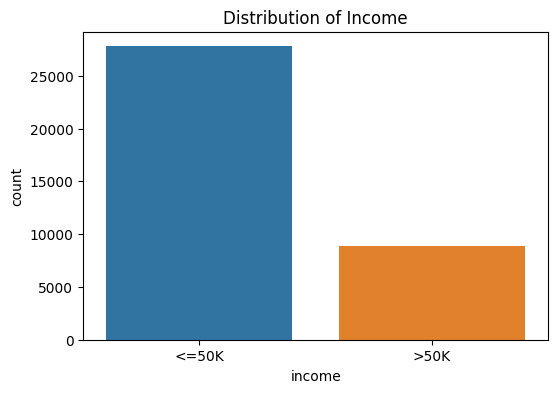

In [10]:
# Visualize the distribution of the target variable (income)
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()

#### Analysis of the 'income' Column

After cleaning the 'income' column by removing inconsistencies and standardizing categories, we now observe a clearer distribution:

- **<=50K:** 27,785 entries
- **>50K:** 8,846 entries

This indicates that a significant portion of the dataset falls into the '<=50K' income category, while a smaller portion belongs to the '>50K' income category.

The clean data allows for more accurate analysis and modeling, providing insights into the factors influencing income levels in the dataset. Further exploration of the relationships between income and other features may reveal patterns and contribute to a better understanding of the dataset.


### one hot encoding

In [11]:
# Perform one-hot encoding on the 'income' column and create new binary columns with 1s and 0s
# income_one_hot = pd.get_dummies(df['income'], prefix='income', drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame (df) without adding an index column
# df = pd.concat([df.reset_index(drop=True), income_one_hot], axis=1)

# Convert the one-hot encoded column 'income_>50K' to integers (1 and 0)
# df['income_>50K'] = df['income_>50K'].astype(int)

# drop the original 'income' column if needed
# df = df.drop('income', axis=1)

# OR 

# Convert 'income' to binary (0 for <=50K, 1 for >50K)
df['income_binary'] = df['income'].map({'<=50K': 0, '>50K': 1}) #  map function  transform values

# Display the first few rows of the DataFrame to check the changes
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_binary
0,18,Private,128538,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K,0
1,36,Private,112271,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,1902,40,United-States,>50K,1
2,35,Private,111387,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,1579,40,United-States,<=50K,0
3,55,Private,118993,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,10,United-States,<=50K,0
4,35,?,317780,Some-college,10,Never-married,?,Unmarried,Black,Female,0,0,40,United-States,<=50K,0


### Showing Educational Level in order

In [12]:
# Create a mapping between education levels and education numbers
education_mapping = df[['education', 'education-num']].drop_duplicates().set_index('education')['education-num'].to_dict()

# Print the mapping
for education, education_num in education_mapping.items():
    print(f"Educational Level: {education}, Education Number: {education_num}")


Educational Level: 11th, Education Number: 7
Educational Level: Bachelors, Education Number: 13
Educational Level: Some-college, Education Number: 10
Educational Level: HS-grad, Education Number: 9
Educational Level: Assoc-voc, Education Number: 11
Educational Level: 5th-6th, Education Number: 3
Educational Level: 9th, Education Number: 5
Educational Level: Assoc-acdm, Education Number: 12
Educational Level: Prof-school, Education Number: 15
Educational Level: 10th, Education Number: 6
Educational Level: 7th-8th, Education Number: 4
Educational Level: Masters, Education Number: 14
Educational Level: Doctorate, Education Number: 16
Educational Level: 12th, Education Number: 8
Educational Level: 1st-4th, Education Number: 2
Educational Level: Preschool, Education Number: 1


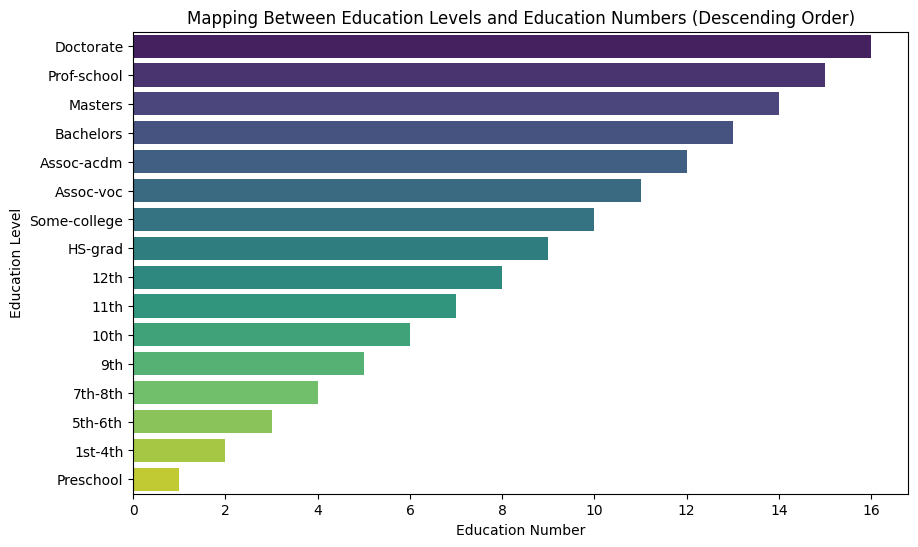

In [13]:
# Create a mapping between education levels and education numbers
education_mapping = df[['education', 'education-num']].drop_duplicates().set_index('education')['education-num'].to_dict()

# Create a DataFrame from the mapping
education_df = pd.DataFrame(list(education_mapping.items()), columns=['Education Level', 'Education Number'])

# Sort the DataFrame by 'Education Number' in descending order
education_df = education_df.sort_values(by='Education Number', ascending=False)

# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='Education Number', y='Education Level', data=education_df, palette='viridis')

# Add labels and title
plt.xlabel('Education Number')
plt.ylabel('Education Level')
plt.title('Mapping Between Education Levels and Education Numbers (Descending Order)')

# Show the plot
plt.show()

### EDA showing relationship for income

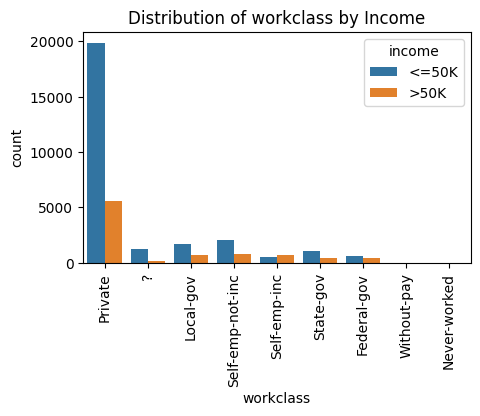

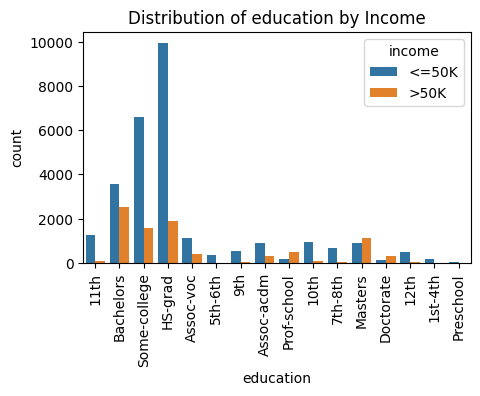

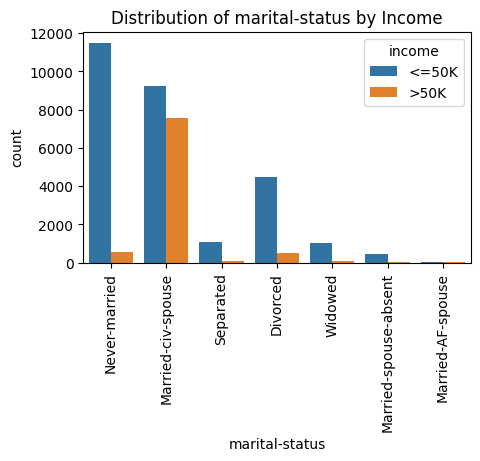

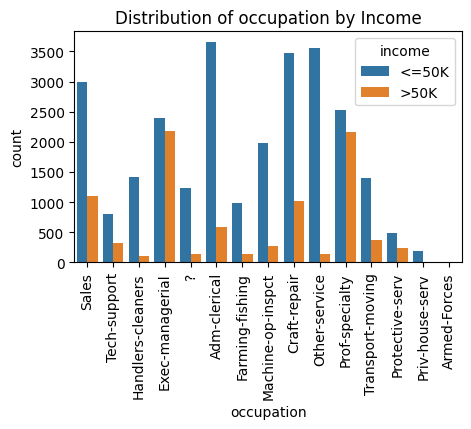

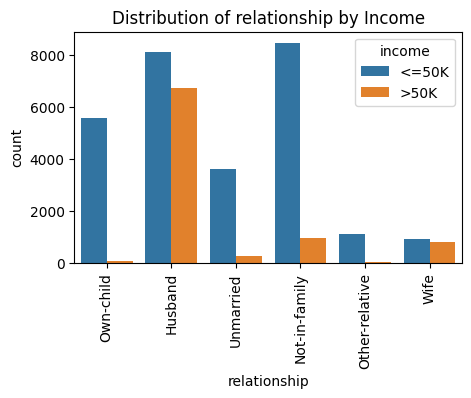

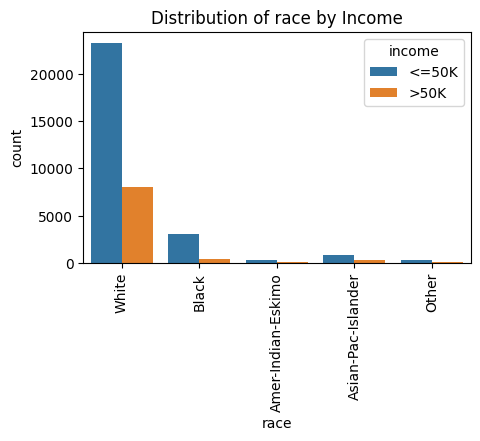

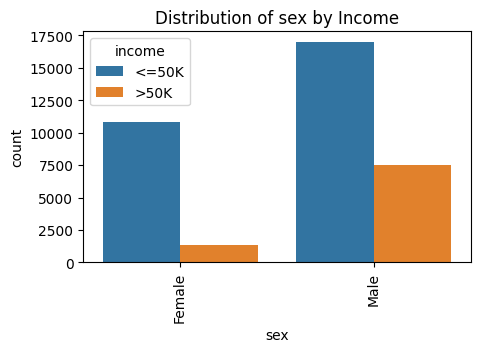

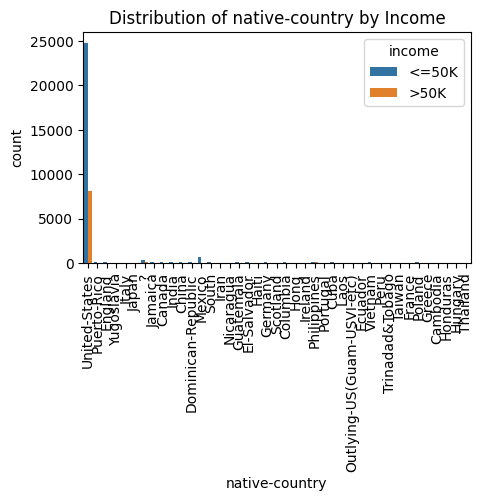

In [14]:
# Explore relationship between categorical features and income
for column in df.select_dtypes(include='object').columns:
    # Exclude the 'income' column itself from the analysis
    if column != 'income':
        # Set up the figure size
        plt.figure(figsize=(5, 3))

        # Create a count plot for the current categorical feature
        sns.countplot(x=column, hue='income', data=df)

        # Add title to the plot
        plt.title(f'Distribution of {column} by Income')

        # Rotate x-axis labels by 90 degrees for better readability
        plt.xticks(rotation=90)

        # Display the plot
        plt.show()


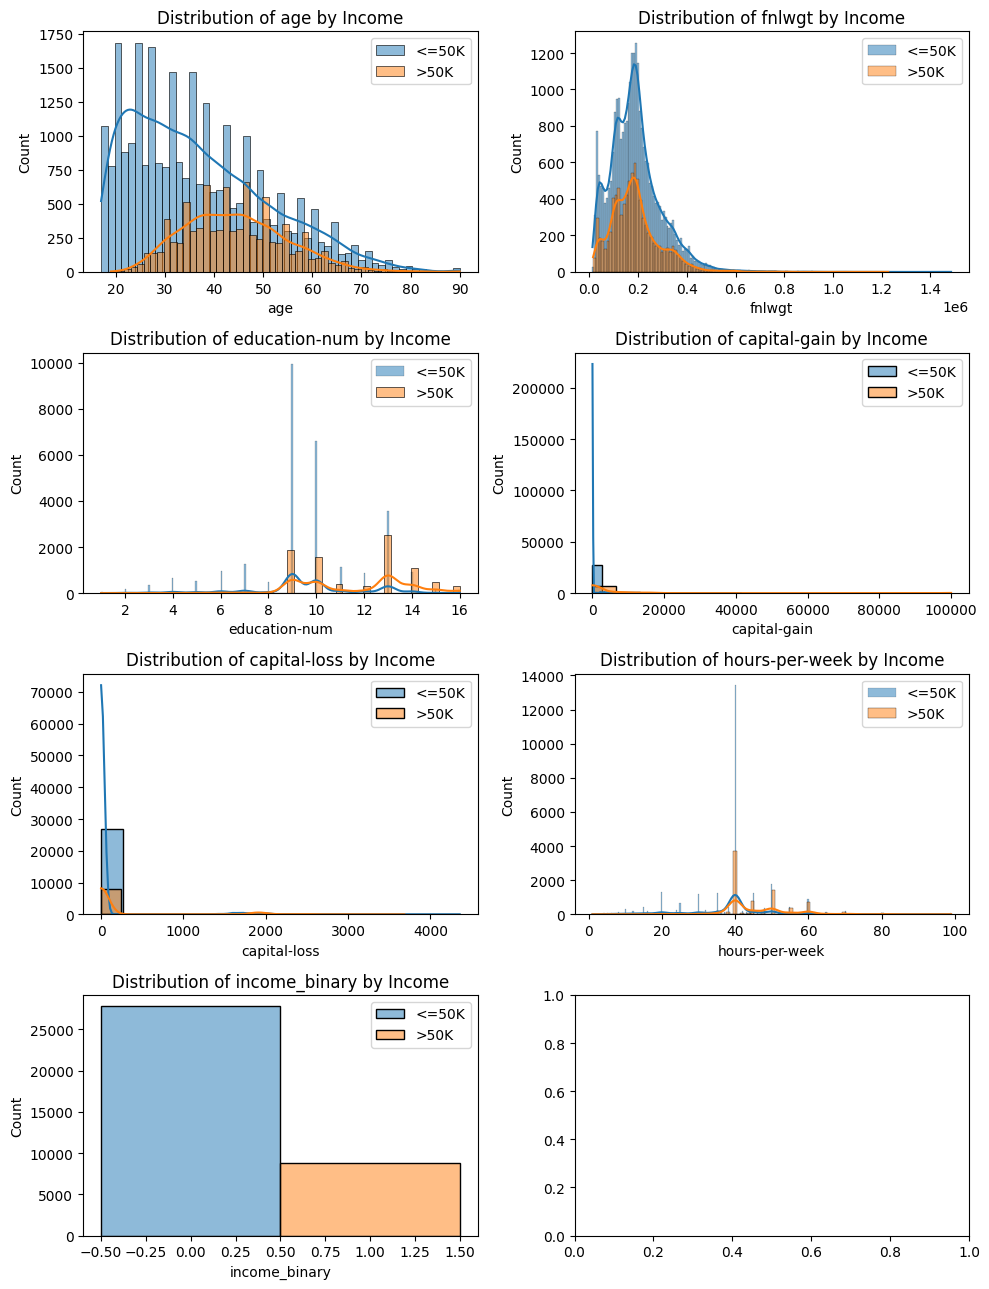

In [15]:
# Explore relationship between numerical features and income
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the number of subplots and their arrangement
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns in the subplot grid
num_rows = -(-num_plots // num_cols)  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 13))

# Flatten the axes array to handle different subplot configurations
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    # Create a histogram for income <=50K
    sns.histplot(df[df['income'] == '<=50K'][column], kde=True, label='<=50K', ax=axes[i])

    # Create a histogram for income >50K
    sns.histplot(df[df['income'] == '>50K'][column], kde=True, label='>50K', ax=axes[i])

    # Add title to the subplot
    axes[i].set_title(f'Distribution of {column} by Income')

    # Display a legend to differentiate between income levels
    axes[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


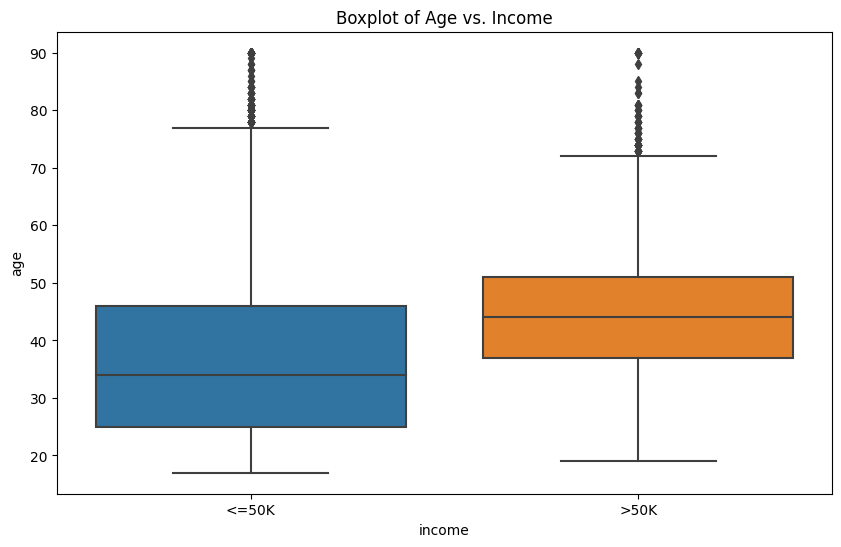

In [16]:
# Boxplot for age vs. income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Boxplot of Age vs. Income')
plt.show()

**Pairplot**

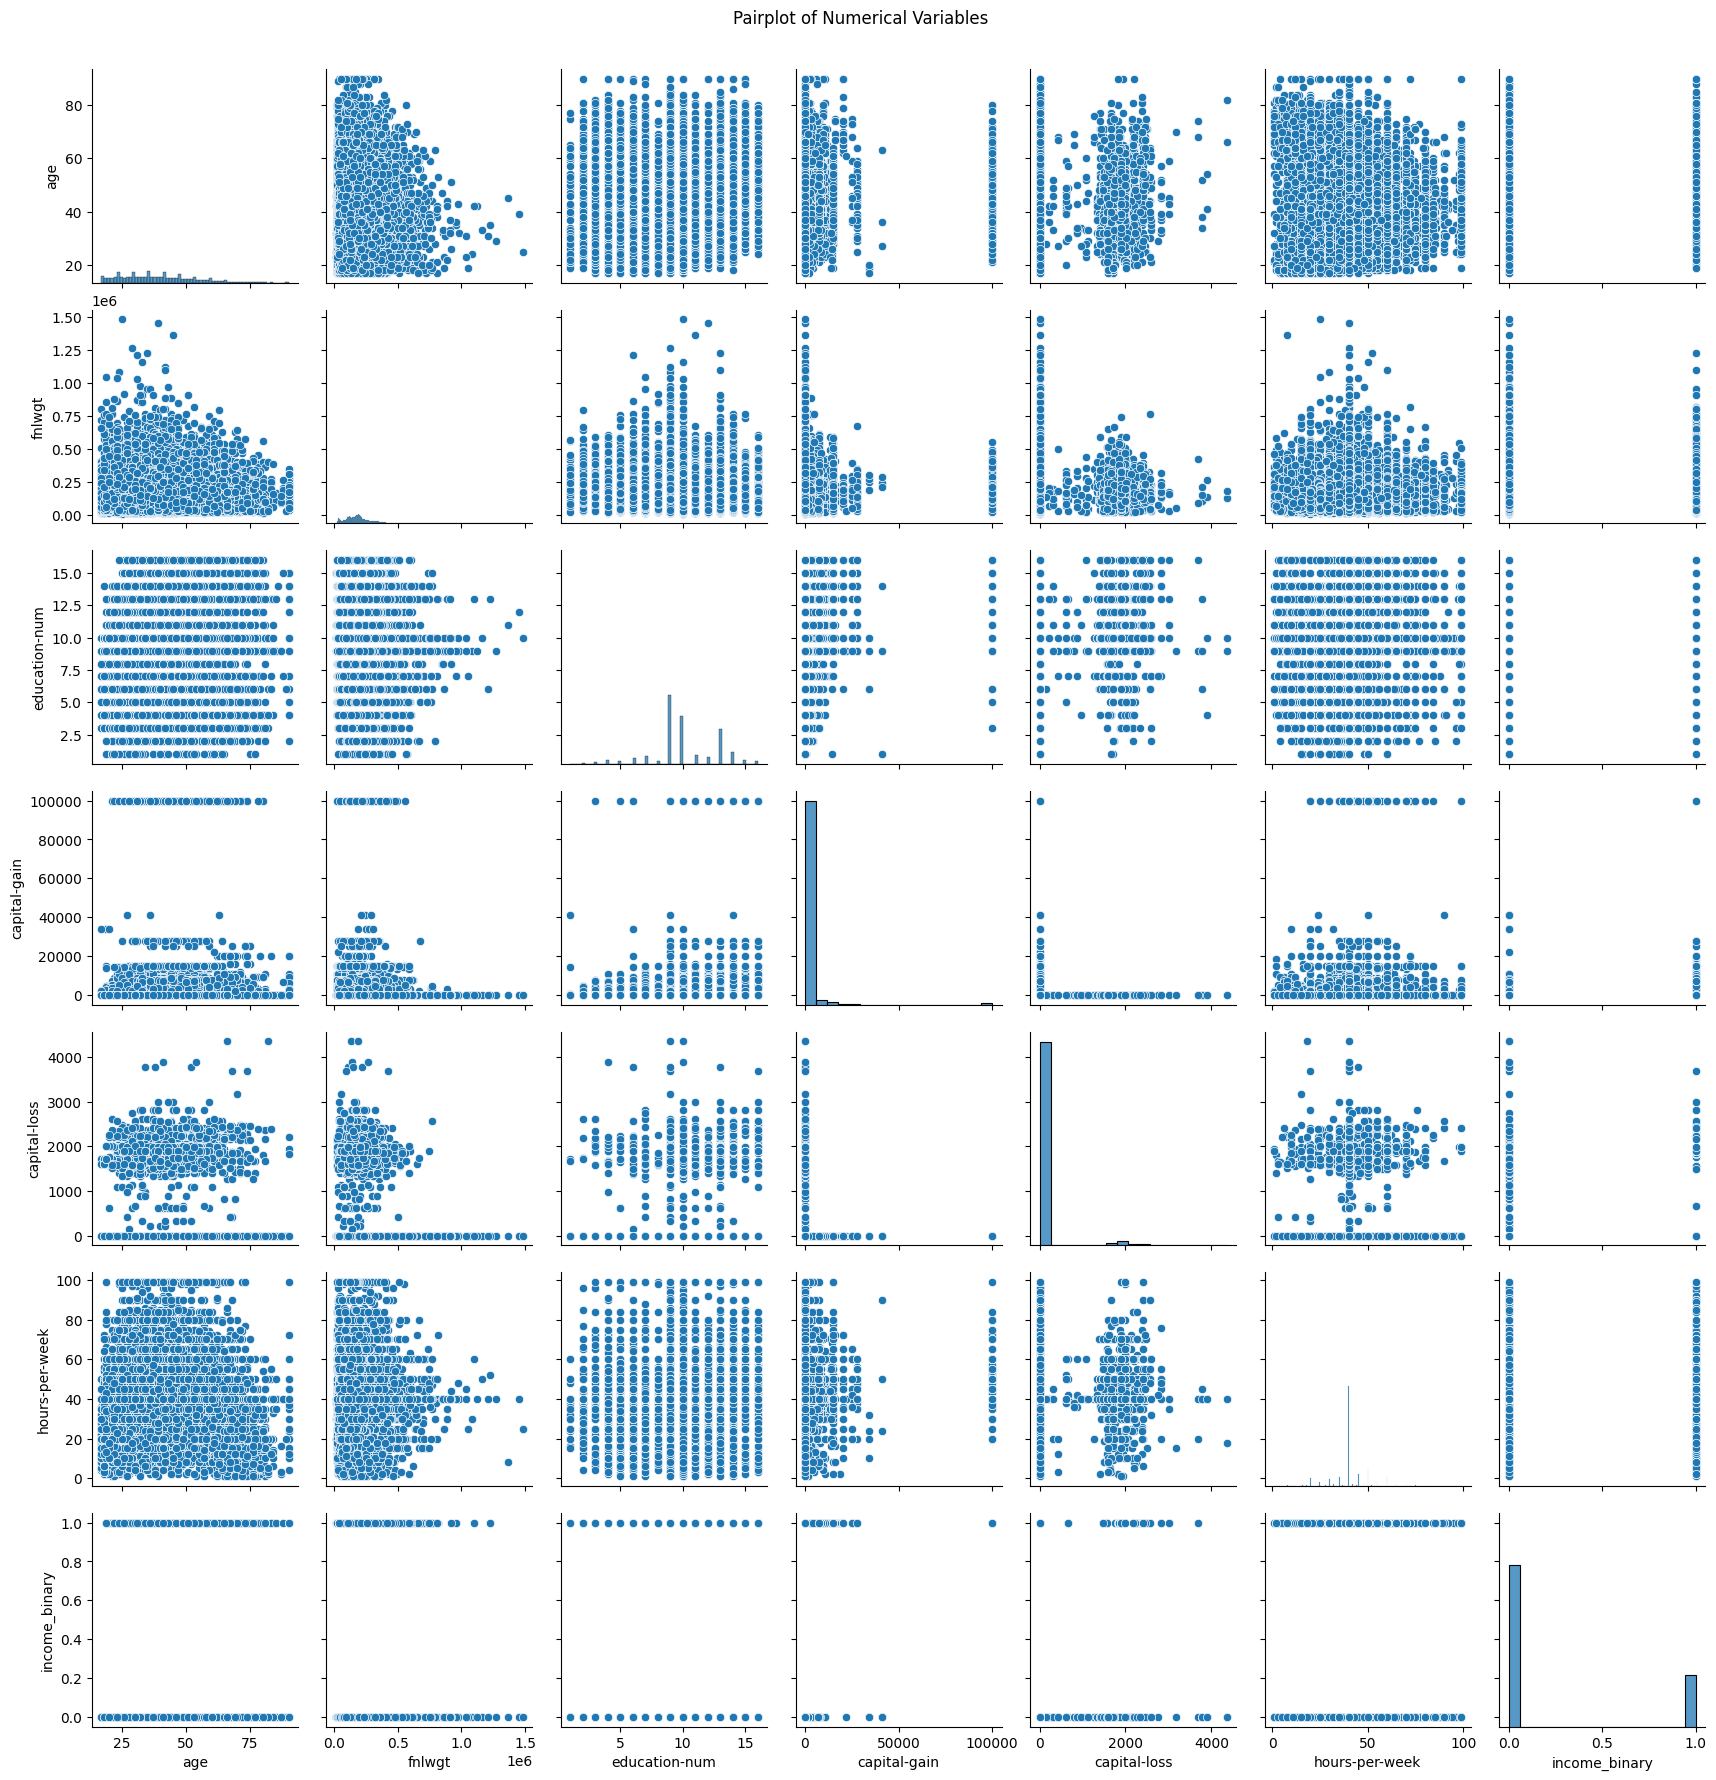

In [17]:
# Pairplot for numerical variables
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

**Heatmap**

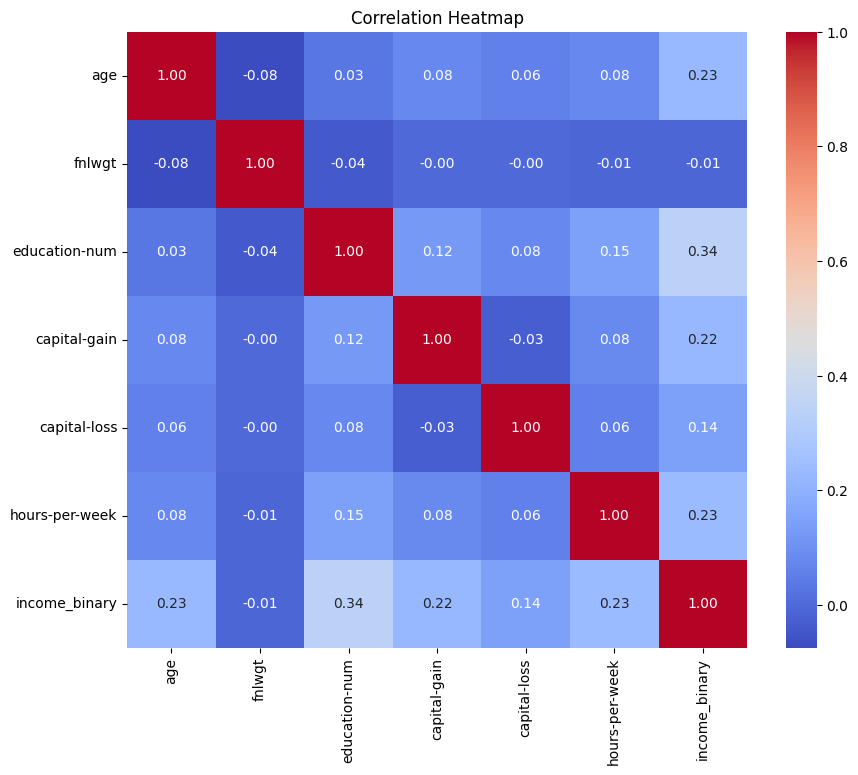

In [18]:
# Correlation heatmap
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Missing Values

Missing values refer to the absence or lack of data in certain observations or variables within a dataset. These values are typically represented by placeholders such as NaN (Not a Number) in numerical datasets or other designated indicators in categorical datasets. Dealing with missing values is a crucial aspect of data preprocessing and analysis, requiring careful consideration to ensure accurate and unbiased results in statistical analyses and machine learning models.


In [19]:
# Fill missing values in the 'workclass' column with the mode (most frequent value)
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)

# Fill missing values in the 'occupation' column with the mode (most frequent value)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

# Fill missing values in the 'native-country' column with the mode (most frequent value)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


#### Handling Missing Values in the Dataset

In the given dataset, certain columns such as 'workclass', 'occupation', and 'native-country' contain missing values. It is crucial to address these missing values as they can impact the quality of data analysis and machine learning model performance.

**Steps Taken:**

1. **'Workclass' Column:**
   - Missing values in the 'workclass' column have been filled using the mode (most frequent value) of the column.
  
2. **'Occupation' Column:**
   - Similar to 'workclass', missing values in the 'occupation' column have been replaced with the mode.

3. **'Native-Country' Column:**
   - For the 'native-country' column, missing values have been imputed with the mode.

#### Reason for Using Mode:

The mode represents the most frequently occurring value in a column. It is a suitable choice for imputing missing values when dealing with categorical data. By using the mode, we aim to maintain the integrity of the original data distribution and minimize the impact of missing values on subsequent analyses or machine learning models.

These steps ensure a more complete and accurate dataset for downstream tasks.


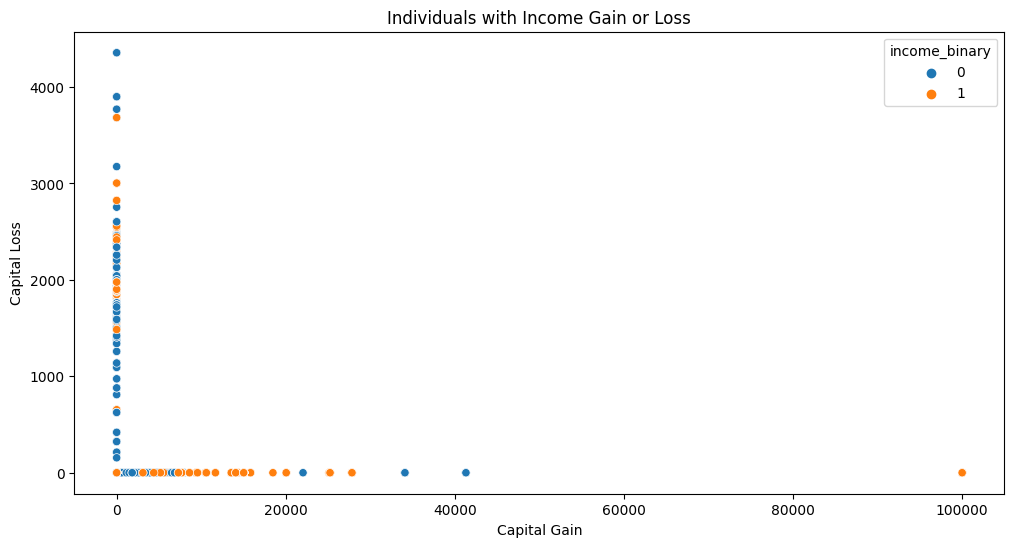

In [20]:
# Plot individuals with income gain or loss

plt.figure(figsize=(12, 6)) # Set the figsize

# Create a scatter plot with 'capital-gain' on the x-axis, 'capital-loss' on the y-axis, and color-coded by 'income_binary'
sns.scatterplot(x='capital-gain', y='capital-loss', hue='income_binary', data=df)
plt.title('Individuals with Income Gain or Loss') # Set the title of the plot
plt.xlabel('Capital Gain') # Label the x-axis
plt.ylabel('Capital Loss') # Label the y-axis
plt.show() # Show the plot


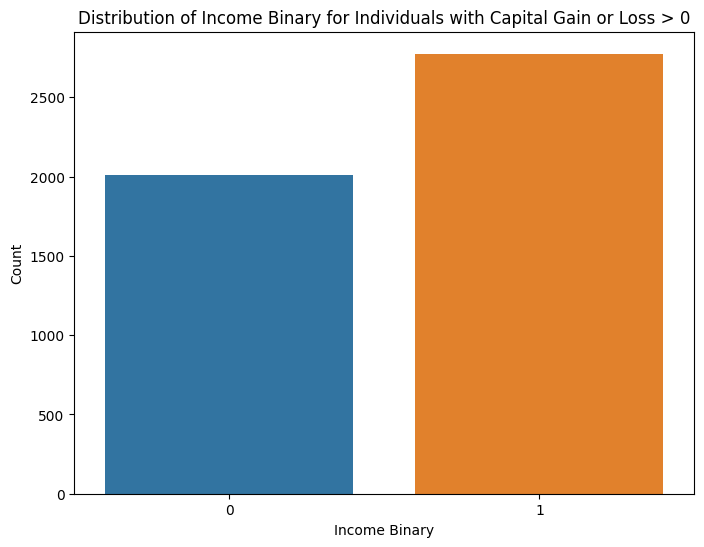

In [21]:
# Create a filtered DataFrame for individuals with either capital gain or capital loss greater than 0
filtered_df = df[(df['capital-gain'] > 0) | (df['capital-loss'] > 0)]

# Plot the distribution of income binary for the filtered individuals
plt.figure(figsize=(8, 6))  # Set the figsize for the plot

# Use Seaborn's countplot to visualize the distribution of 'income_binary' for the filtered DataFrame
sns.countplot(x='income_binary', data=filtered_df)

# Set the title of the plot
plt.title('Distribution of Income Binary for Individuals with Capital Gain or Loss > 0')

# Label the x-axis
plt.xlabel('Income Binary')

# Label the y-axis
plt.ylabel('Count')

# Show the plot
plt.show()


In [22]:
# Combine 'capital-gain' and 'capital-loss' into a single feature 'net-capital'
df['net-capital'] = df['capital-gain'] - df['capital-loss']

# Create a 'has-capital' binary feature indicating if the individual has any capital gains or losses
df['has-capital'] = (df['capital-gain'] > 0) | (df['capital-loss'] > 0)

# If 'net-capital' is negative, set 'has-capital' to False for half of the rows
df.loc[df['net-capital'] < 0, 'has-capital'] = False

# Check whether NaN is fild or not 
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
income_binary     0
net-capital       0
has-capital       0
dtype: int64

#### Feature Engineering and Handling Missing Values in the Dataset

In this data preprocessing step, several operations are performed to enhance the dataset and address specific characteristics:

#### Feature Combination:
- **'net-capital' Feature Creation:**
  - A new feature 'net-capital' is created by subtracting 'capital-loss' from 'capital-gain'. This combined feature provides a consolidated measure of an individual's financial gains or losses.

#### Binary Feature Creation:
- **'has-capital' Binary Feature:**
  - Another binary feature 'has-capital' is introduced to indicate whether an individual has any capital gains or losses. It is computed based on the logical OR operation between 'capital-gain' and 'capital-loss'.

#### Handling Negative 'net-capital':
- **Adjusting 'has-capital' for Negative 'net-capital':**
  - In cases where 'net-capital' is negative, indicating more losses than gains, 'has-capital' is set to False for half of the rows. This adjustment ensures a more accurate representation of individuals without significant capital.

#### Checking for Missing Values:
- **NaN Check:**
  - A check is performed to identify and count missing values in the dataset using `df.isnull().sum()`.

These preprocessing steps contribute to a more informative and complete dataset, better suited for subsequent analyses or machine learning modeling.


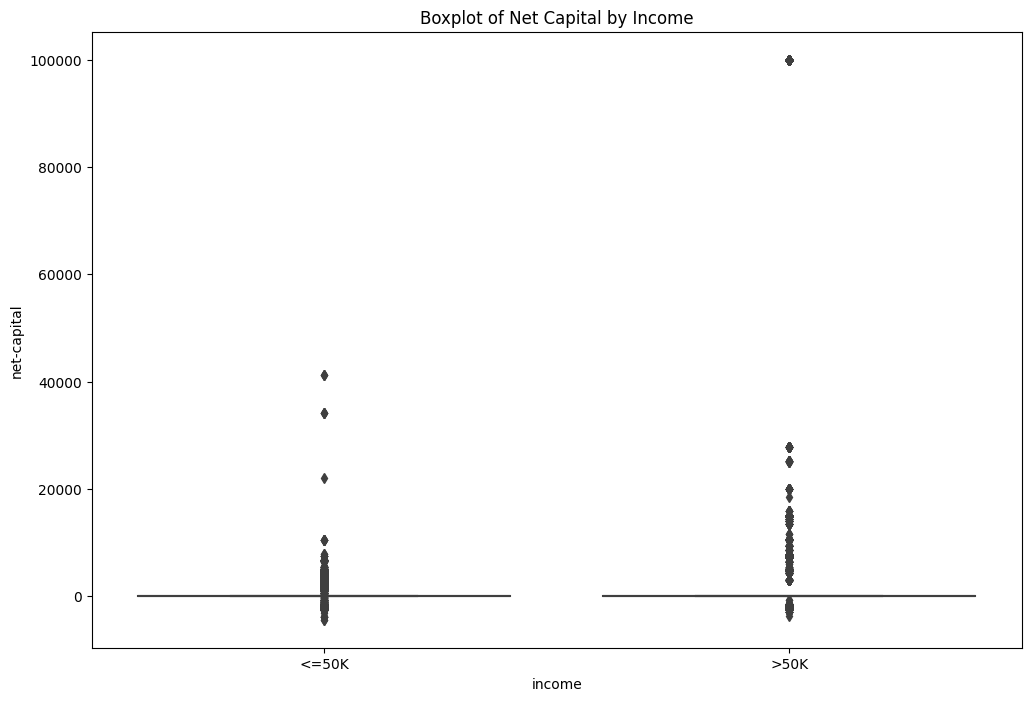

In [23]:
# Set the figure size for the boxplot
plt.figure(figsize=(12, 8))

# Create a boxplot to visualize the distribution of 'net-capital' across different income levels
sns.boxplot(x='income', y='net-capital', data=df)

# Set the title of the plot
plt.title('Boxplot of Net Capital by Income')

# Show the plot
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Drop the 'income_binary' column
df = df.drop('income_binary', axis=1)

def encode_categorical_columns(df):
    # Identify object-type columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Create a new DataFrame to store the encoded values
    df_encoded = df.copy()

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        # Replace NaN with a placeholder value (you can customize this)
        df_encoded[column].fillna('unknown', inplace=True)

        # Encode the categorical column and store the mapping
        df_encoded[column + '_encoded'] = label_encoder.fit_transform(df_encoded[column])

    return df_encoded

# Assuming df is your DataFrame
df_encoded = encode_categorical_columns(df)

# Display the changes

# Loop through columns of object data type in the original DataFrame
for column in df.select_dtypes(include=['object']).columns:
    # Get unique values in the original and encoded columns
    unique_values_original = df[column].unique()
    unique_values_encoded = df_encoded[column + '_encoded'].unique()

    # Print original and encoded unique values for comparison
    print(f'{column}: Original unique values: {unique_values_original}')
    print(f'{column}_encoded: Encoded unique values: {unique_values_encoded}\n')

    # Drop the original column from the encoded DataFrame
    df_encoded.drop(columns=column, inplace=True)

# Display the modified DataFrame
df_encoded.head()


workclass: Original unique values: ['Private' '?' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']
workclass_encoded: Encoded unique values: [4 0 2 6 5 7 1 8 3]

education: Original unique values: ['11th' 'Bachelors' 'Some-college' 'HS-grad' 'Assoc-voc' '5th-6th' '9th'
 'Assoc-acdm' 'Prof-school' '10th' '7th-8th' 'Masters' 'Doctorate' '12th'
 '1st-4th' 'Preschool']
education_encoded: Encoded unique values: [ 1  9 15 11  8  4  6  7 14  0  5 12 10  2  3 13]

marital-status: Original unique values: ['Never-married' 'Married-civ-spouse' 'Separated' 'Divorced' 'Widowed'
 'Married-spouse-absent' 'Married-AF-spouse']
marital-status_encoded: Encoded unique values: [4 2 5 0 6 3 1]

occupation: Original unique values: ['Sales' 'Tech-support' 'Handlers-cleaners' 'Exec-managerial' '?'
 'Adm-clerical' 'Farming-fishing' 'Machine-op-inspct' 'Craft-repair'
 'Other-service' 'Prof-specialty' 'Transport-moving' 'Protective-serv'
 'Priv-house-serv' 'Ar

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,net-capital,has-capital,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native-country_encoded,income_encoded
0,18,128538,7,0,0,25,0,False,4,1,4,12,3,4,0,38,0
1,36,112271,13,0,1902,40,-1902,False,4,9,2,13,0,4,1,38,1
2,35,111387,10,0,1579,40,-1579,False,4,15,2,6,0,4,1,38,0
3,55,118993,10,0,0,10,0,False,4,15,5,4,4,4,0,38,0
4,35,317780,10,0,0,40,0,False,0,15,4,0,4,2,0,38,0


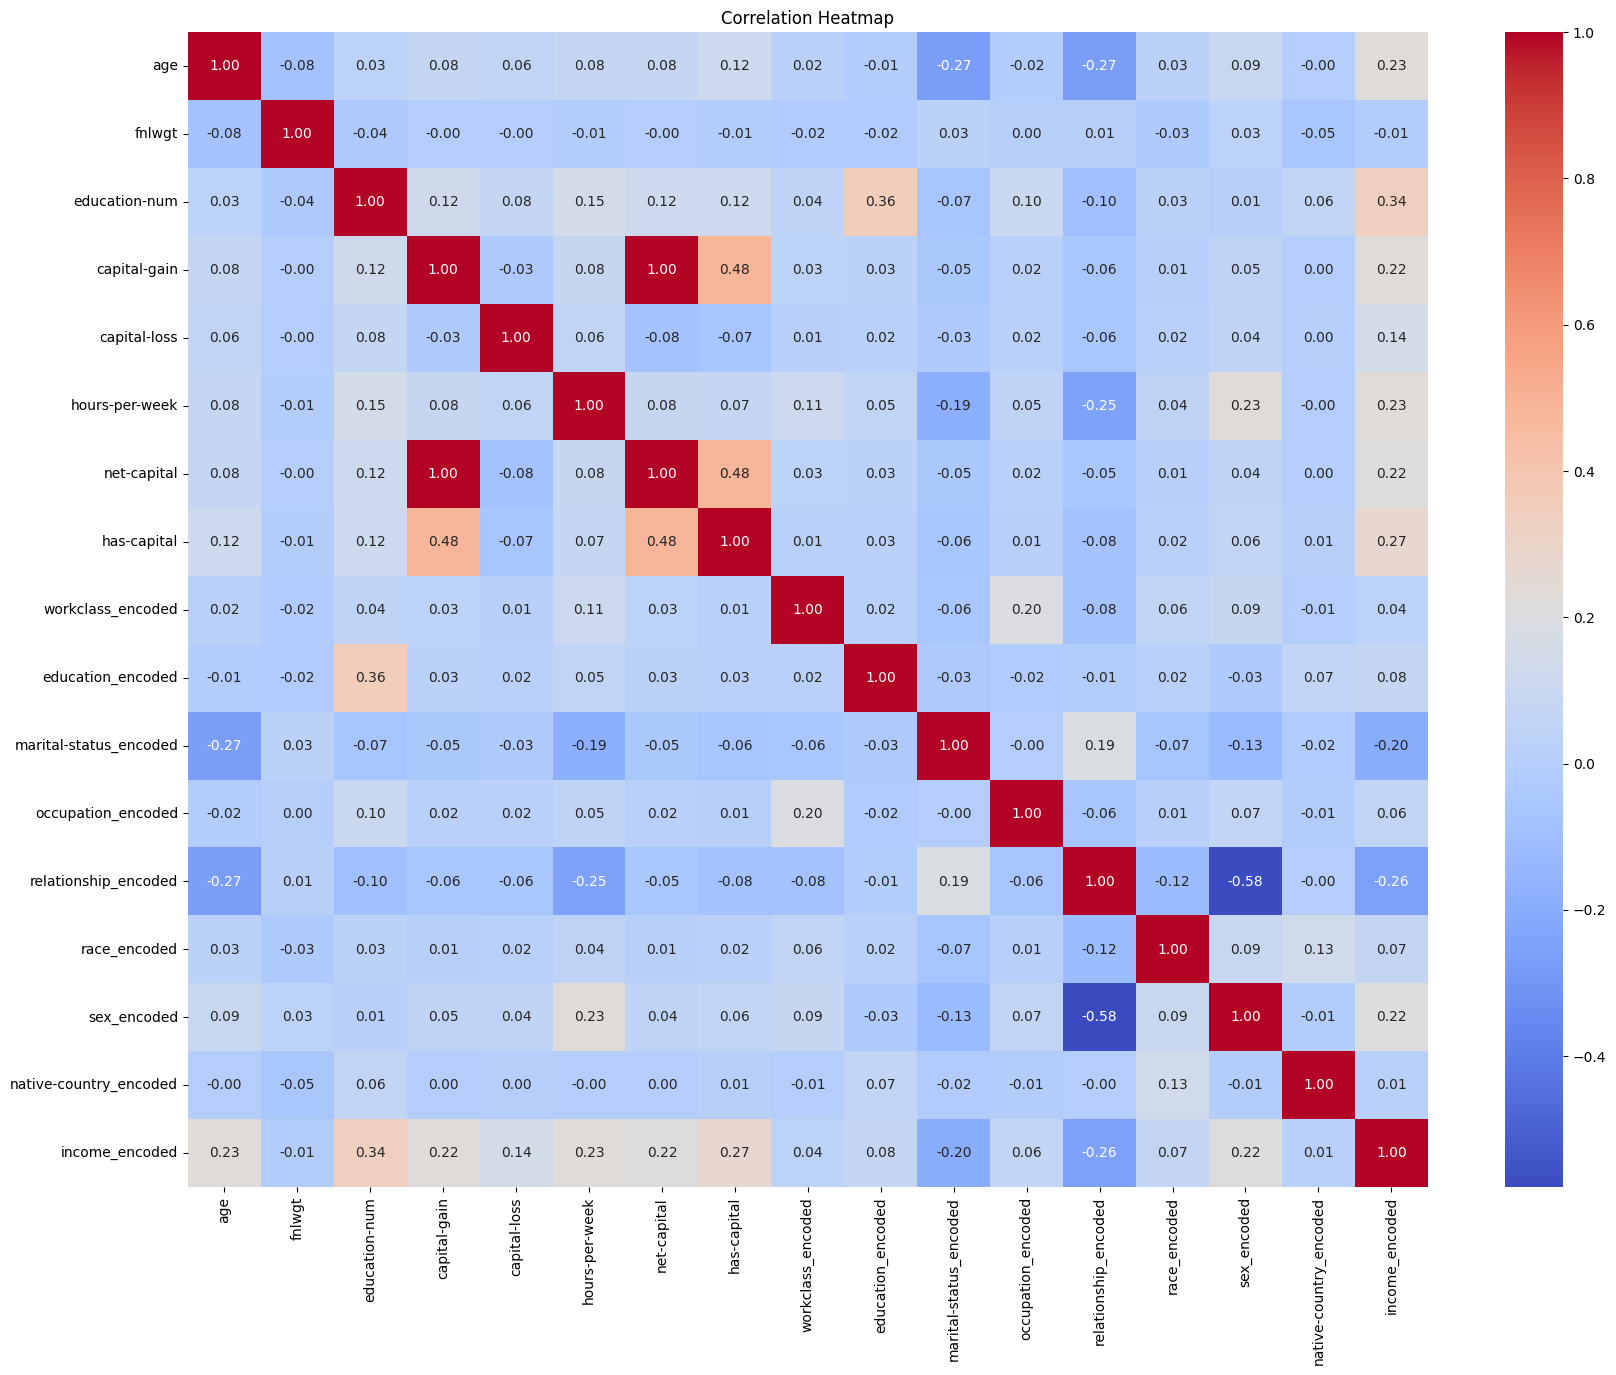

In [25]:
# Set the size of the heatmap figure
plt.figure(figsize=(20, 15))

# Create a heatmap with correlation values annotated
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap') # Set the title of the plot
plt.show() # Display the heatmap


### Encoding Categorical Columns in the Dataset

In this data preprocessing step, categorical columns in the original dataset are encoded using the LabelEncoder from the scikit-learn library. The goal is to convert categorical variables into numerical format, which is often required for machine learning algorithms.

#### Code Overview:

- **Drop 'income_binary' Column:**
  - The binary income column, 'income_binary,' is dropped from the DataFrame as it is not needed for encoding categorical variables because whem encoding 'income' column it will give same output as 'income_binary' column.

- **Encode Categorical Columns:**
  - The `encode_categorical_columns` function is defined to handle the encoding process.
  - NaN values in categorical columns are replaced with a placeholder value ('unknown') to ensure compatibility with LabelEncoder, but as there is no missing values in this cata base no changes will be applied.
  - The LabelEncoder is used to transform categorical columns into numerical representations. Encoded values are stored in new columns appended with '_encoded.'

- **Comparison of Unique Values:**
  - After encoding, a loop is initiated to compare unique values between the original and encoded columns.
  - This comparison helps ensure the integrity of the encoding process and provides insights into any changes.


These preprocessing steps contribute to the creation of a numerical representation of categorical data, making it suitable for machine learning algorithms.


## Grid Search and Ml Algorithm 

In [26]:
# Import necessary modules for machine learning
from sklearn.model_selection import train_test_split  # Module for splitting data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # Modules for evaluating model performance
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier  # k-Nearest Neighbors classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.model_selection import GridSearchCV # For hyperparameter tuning using Grid Search

In [27]:
def grid_search_best_model(X, y):

    # Initialize classifiers
    naive_bayes_model = GaussianNB()  # Initialize a Gaussian Naive Bayes classifier
    knn_model = KNeighborsClassifier()  # Initialize a k-Nearest Neighbors classifier
    logistic_model = LogisticRegression()  # Initialize a Logistic Regression classifier
    svm_model = SVC()  # Initialize a Support Vector Machine classifier
    decision_tree_model = DecisionTreeClassifier(random_state=42)  # Initialize a Decision Tree classifier with a specified random seed
    random_forest_model = RandomForestClassifier(random_state=42)  # Initialize a Random Forest classifier with a specified random seed


    # Define the parameter grid for each classifier
    param_grid_naive_bayes = {}  # No hyperparameters to tune for Gaussian Naive Bayes
    param_grid_knn = {'n_neighbors': [3, 5, 7]}  # Hyperparameter grid for k-Nearest Neighbors: number of neighbors
    param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Hyperparameter grid for Logistic Regression: regularization strength
    param_grid_decision_tree = {'max_depth': [None, 5, 10, 15, 20]}  # Hyperparameter grid for Decision Tree: maximum depth of the tree
    param_grid_random_forest = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 15]}  # Hyperparameter grid for Random Forest: number of trees and maximum depth
    param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}  # Hyperparameter grid for Support Vector Machine: regularization parameter and kernel width

    # Create a dictionary mapping models to their respective parameter grids
    model_param_grids = {
        naive_bayes_model: param_grid_naive_bayes,  # Gaussian Naive Bayes with an empty hyperparameter grid
        knn_model: param_grid_knn,  # k-Nearest Neighbors with the specified neighbors hyperparameter grid
        logistic_model: param_grid_logistic,  # Logistic Regression with the regularization strength hyperparameter grid
        decision_tree_model: param_grid_decision_tree,  # Decision Tree with the maximum depth hyperparameter grid
        random_forest_model: param_grid_random_forest,  # Random Forest with the number of trees and maximum depth hyperparameter grid
        svm_model: param_grid_svm,  # Support Vector Machine with the regularization parameter and kernel width hyperparameter grid
    }

    # Split the data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.9, random_state=42)

    # Initialize variables to track the best-performing model and its associated accuracy
    best_model = None  # Variable to store the best model
    best_accuracy = 0  # Variable to store the highest accuracy achieved by any model

    for model, param_grid in model_param_grids.items():
        # Perform grid search using cross-validation
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model from grid search
        best_model_candidate = grid_search.best_estimator_

        # Validate on the validation set
        y_val_pred = best_model_candidate.predict(X_val)
        validation_accuracy = accuracy_score(y_val, y_val_pred)
        print(f'{model.__class__.__name__} Validation Accuracy: {validation_accuracy}')

        # Print a classification report for the validation set
        report_val = classification_report(y_val, y_val_pred)
        print(report_val)

        # Evaluate on the test set
        y_test_pred = best_model_candidate.predict(X_test)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f'{model.__class__.__name__} Test Accuracy: {test_accuracy}')

        # Print a classification report for the test set
        report_test = classification_report(y_test, y_test_pred)
        print(report_test)

        # Compare accuracies and update the best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_model = best_model_candidate

        print('\n' + '-'*60 + '\n')

    print(f'The best model after grid search is {best_model.__class__.__name__} with Test Accuracy: {best_accuracy}')


# Separate features and target variable
X = df_encoded.drop(['income_encoded',"fnlwgt"], axis=1)  # Features
y = df_encoded['income_encoded']  # Target variable

# Call the function to perform grid search and train the best model
grid_search_best_model(X, y)


GaussianNB Validation Accuracy: 0.8107370336669699
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       848
           1       0.67      0.33      0.45       251

    accuracy                           0.81      1099
   macro avg       0.75      0.64      0.67      1099
weighted avg       0.79      0.81      0.79      1099

GaussianNB Test Accuracy: 0.7943585077343039
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      7523
           1       0.65      0.31      0.42      2368

    accuracy                           0.79      9891
   macro avg       0.73      0.63      0.65      9891
weighted avg       0.77      0.79      0.77      9891


------------------------------------------------------------

KNeighborsClassifier Validation Accuracy: 0.8516833484986351
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       848
           1     

### Grid Search for Best Model

In this notebook, I'm performing a grid search to find the best hyperparameters for various classification models. The goal is to optimize model performance on predicting the 'income_encoded' target variable.

#### Models and Hyperparameters

I've selected several classifiers, each with its hyperparameter grid for optimization:
- Gaussian Naive Bayes
- k-Nearest Neighbors
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine

The hyperparameters for each model have been carefully chosen to cover a range of possibilities.

#### Data Splitting

I've split the dataset into training, validation, and test sets to ensure fair evaluation:
- 70% for training
- 10% for validation
- 20% for final testing

This helps in preventing overfitting and allows for model evaluation on unseen data.

#### Grid Search and Evaluation

The grid search is conducted using cross-validation (cv=5) to explore different hyperparameter combinations. For each model, the best hyperparameters are selected based on accuracy on the training set.

The validation set is then used to assess the model's performance with the chosen hyperparameters. Finally, the test set provides an unbiased evaluation of the model's generalization to new data.

#### Best Model Selection

I'm tracking the best-performing model based on test accuracy. This ensures that the model selected has demonstrated superior performance on unseen data.

Let's dive into the grid search and find the optimal configuration for each model.


# For Test Data

**With INCOME**

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

class IncomeClassifier:
    def __init__(self, df):
        self.df = df
        self.label_encoders = {}
        self.best_model = None
        self.best_accuracy = 0
        self.categorical_columns = []

    def preprocess_data(self):
        # Strip '.' from 'income' column values
        self.df['income'] = self.df['income'].str.strip('.')

        # Combine 'capital-gain' and 'capital-loss' into a single feature 'net-capital'
        self.df['net-capital'] = self.df['capital-gain'] - self.df['capital-loss']

        # Create a 'has-capital' binary feature indicating if the individual has any capital gains or losses
        self.df['has-capital'] = (self.df['capital-gain'] > 0) | (self.df['capital-loss'] > 0)

    def fill_missing_values(self, df):
        # List of categorical columns to fill with mode
        self.categorical_columns = [col for col in df.columns if col not in ['income', 'income_binary', 'net-capital', 'has-capital']]

        # Fill missing values in categorical columns with their respective modes
        for column in self.categorical_columns:
            df[column].fillna(df[column].mode()[0], inplace=True)
        return df

    def encode_categorical_columns(self, df):

        for column in self.categorical_columns:
            df[column].fillna('unknown', inplace=True)  # Fixed inplace parameter
            le = LabelEncoder()
            self.label_encoders[column] = le
            df[column] = le.fit_transform(df[column])

        return df

    def grid_search_best_model(self):
        # Separate features and target variable
        X = self.df.drop(['income', 'fnlwgt'], axis=1)
        y = self.df['income']

        # Separate numerical and categorical columns
        numerical_columns = X.select_dtypes(include=['number']).columns
        categorical_columns = X.select_dtypes(include=['object']).columns

        # Define transformers for numerical and categorical columns
        numerical_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Create a column transformer
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_columns),
                ('cat', categorical_transformer, categorical_columns)
            ])

        # Initialize classifiers
        knn_model = KNeighborsClassifier()
        logistic_model = LogisticRegression()
        svm_model = SVC()
        decision_tree_model = DecisionTreeClassifier(random_state=42)
        random_forest_model = RandomForestClassifier(random_state=42)

        # Define the parameter grid for each classifier
        param_grid_knn = {'classifier__n_neighbors': [3, 5, 7]}
        param_grid_logistic = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
        param_grid_decision_tree = {'classifier__max_depth': [None, 5, 10, 15, 20]}
        param_grid_random_forest = {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 5, 10, 15]}
        #param_grid_svm = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1]}

        # Create a dictionary mapping models to their respective parameter grids
        model_param_grids = {
            knn_model: param_grid_knn,
            logistic_model: param_grid_logistic,
            decision_tree_model: param_grid_decision_tree,
            random_forest_model: param_grid_random_forest,
            # svm_model: param_grid_svm,
        }

        for model, param_grid in model_param_grids.items():
            # Create a pipeline with preprocessing and the classifier
            pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', model)])

            # Split data into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Perform grid search using cross-validation
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_train, y_train)

            # Get the best model from grid search
            best_model_candidate = grid_search.best_estimator_

            # Compare accuracies and update the best model
            if grid_search.best_score_ > self.best_accuracy:
                self.best_accuracy = grid_search.best_score_
                self.best_model = best_model_candidate

            # Make predictions on the test set and print the classification report
            predictions = best_model_candidate.predict(X_test)
            self.evaluate_model(model.__class__.__name__, y_test, predictions)

        print(f'The best model after grid search is {self.best_model.named_steps["classifier"].__class__.__name__} with Validation Accuracy: {self.best_accuracy}')

    def evaluate_model(self, model_name, y_true, y_pred):
        report = classification_report(y_true, y_pred)
        print(f"Classification Report for {model_name}:\n{report}")

    def predict(self, df_test):
        # Preprocess and fill missing values in the test data
        df_test = self.fill_missing_values(df_test)
        df_test = self.encode_categorical_columns(df_test)

        # Separate features for prediction (excluding 'income' and 'income_binary')
        X_test_pred = df_test.drop(['income', 'fnlwgt'], axis=1)

        # Use the saved label encoders for categorical columns
        for column, le in self.label_encoders.items():
            df_test[column] = le.transform(df_test[column])

        # Make predictions using the best model from grid search
        predictions = self.best_model.predict(X_test_pred)

        return predictions

# Read training data
df_1 = pd.read_excel('Income Train.xlsx')
df = df_1

# Create an instance of the IncomeClassifier class
income_classifier = IncomeClassifier(df)

# Preprocess data, fill missing values, and perform grid search for the best model
income_classifier.preprocess_data()
df = income_classifier.fill_missing_values(df)
df = income_classifier.encode_categorical_columns(df)
income_classifier.grid_search_best_model()

# Read test data
df_2 = pd.read_excel('Income Test.xlsx')
df_test = df_2

# Make predictions on the test data
predictions = income_classifier.predict(df_test)


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      5586
        >50K       0.70      0.62      0.66      1741

    accuracy                           0.85      7327
   macro avg       0.79      0.77      0.78      7327
weighted avg       0.84      0.85      0.84      7327

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

       <=50K       0.85      0.95      0.89      5586
        >50K       0.73      0.46      0.56      1741

    accuracy                           0.83      7327
   macro avg       0.79      0.70      0.73      7327
weighted avg       0.82      0.83      0.82      7327

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.91      5586
        >50K       0.73      0.65      0.69      1741

    accuracy                          

ValueError: y contains previously unseen labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import scipy.sparse as sp

class IncomeClassifier:
    def __init__(self, df):
        self.df = df
        self.label_encoders = {}
        self.best_model = None
        self.best_accuracy = 0
        self.categorical_columns = []

    def preprocess_data(self):
        # Strip '.' from 'income' column values
        self.df['income'] = self.df['income'].str.strip('.')

        # Combine 'capital-gain' and 'capital-loss' into a single feature 'net-capital'
        self.df['net-capital'] = self.df['capital-gain'] - self.df['capital-loss']

        # Create a 'has-capital' binary feature indicating if the individual has any capital gains or losses
        self.df['has-capital'] = (self.df['capital-gain'] > 0) | (self.df['capital-loss'] > 0)

    def fill_missing_values(self, df):
        # List of categorical columns to fill with mode
        self.categorical_columns = [col for col in df.columns if col not in ['income', 'income_binary', 'net-capital', 'has-capital']]

        # Fill missing values in categorical columns with their respective modes
        for column in self.categorical_columns:
            df[column].fillna(df[column].mode()[0], inplace=True)
        return df

    def encode_categorical_columns(self, df):
        for column in self.categorical_columns:
            df[column].fillna('unknown', inplace=True)  # Fixed inplace parameter

            # Check if the column has a corresponding LabelEncoder
            if column in self.label_encoders:
                # Check if the column has unseen labels
                unseen_labels = set(df[column]) - set(self.label_encoders[column].classes_)

                if unseen_labels:
                    print(f"Warning: Unseen labels in '{column}': {unseen_labels}")
                    df[column] = df[column].replace(list(unseen_labels), 'unknown')

        # Separate numerical and categorical columns
        numerical_columns = df.select_dtypes(include=['number']).columns
        categorical_columns = df.select_dtypes(include=['object']).columns

        # Define transformers for numerical and categorical columns
        numerical_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Create a column transformer
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_columns),
                ('cat', categorical_transformer, categorical_columns)
            ])

        # Transform the DataFrame
        df = preprocessor.fit_transform(df)

        return df

    def grid_search_best_model(self):
        # Separate features and target variable
        X = self.df.drop(['income', 'fnlwgt'], axis=1)
        y = self.df['income']

        # Separate numerical and categorical columns
        numerical_columns = X.select_dtypes(include=['number']).columns
        categorical_columns = X.select_dtypes(include=['object']).columns

        # Define transformers for numerical and categorical columns
        numerical_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Create a column transformer
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_columns),
                ('cat', categorical_transformer, categorical_columns)
            ])

        # Initialize classifiers
        knn_model = KNeighborsClassifier()
        logistic_model = LogisticRegression()
        #svm_model = SVC()
        decision_tree_model = DecisionTreeClassifier(random_state=42)
        random_forest_model = RandomForestClassifier(random_state=42)

        # Define the parameter grid for each classifier
        param_grid_knn = {'classifier__n_neighbors': [3, 5, 7]}
        param_grid_logistic = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
        param_grid_decision_tree = {'classifier__max_depth': [None, 5, 10, 15, 20]}
        param_grid_random_forest = {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 5, 10, 15]}
        #param_grid_svm = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1]}

        # Create a dictionary mapping models to their respective parameter grids
        model_param_grids = {
            knn_model: param_grid_knn,
            logistic_model: param_grid_logistic,
            decision_tree_model: param_grid_decision_tree,
            random_forest_model: param_grid_random_forest,
            # svm_model: param_grid_svm,
        }

        for model, param_grid in model_param_grids.items():
            # Create a pipeline with preprocessing and the classifier
            pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', model)])

            # Split data into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Perform grid search using cross-validation
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_train, y_train)

            # Get the best model from grid search
            best_model_candidate = grid_search.best_estimator_

            # Compare accuracies and update the best model
            if grid_search.best_score_ > self.best_accuracy:
                self.best_accuracy = grid_search.best_score_
                self.best_model = best_model_candidate

            # Make predictions on the test set and print the classification report
            predictions = best_model_candidate.predict(X_test)
            self.evaluate_model(model.__class__.__name__, y_test, predictions)

        print(f'The best model after grid search is {self.best_model.named_steps["classifier"].__class__.__name__} with Validation Accuracy: {self.best_accuracy}')

    def evaluate_model(self, model_name, y_true, y_pred):
        report = classification_report(y_true, y_pred)
        print(f"Classification Report for {model_name}:\n{report}")

    def predict(self, df_test):
        # Preprocess and fill missing values in the test data
        df_test = self.fill_missing_values(df_test)
        df_test = self.encode_categorical_columns(df_test)

        # Use the saved label encoders for categorical columns
        for column, le in self.label_encoders.items():
            df_test[column] = le.transform(df_test[column])

        # Separate features for prediction (excluding 'income' and 'fnlwgt')
        X_test_pred = df_test.drop(['income', 'fnlwgt'], axis=1, errors='ignore')

        # Check if X_test_pred is sparse
        if sp.issparse(X_test_pred):
            # Transform the sparse matrix using the preprocessor
            X_test_pred = self.best_model.named_steps['preprocessor'].transform(X_test_pred)

        # Make predictions using the best model from grid search
        predictions = self.best_model.predict(X_test_pred)

        return predictions
    def get_transformed_column_names(self):
        # Get the transformed column names after preprocessing
        preprocessor = self.best_model.named_steps['preprocessor']
        transformed_columns = preprocessor.get_feature_names_out()

        # Extract column names from the transformed_columns
        transformed_columns = [col.split('_')[-1] for col in transformed_columns]

        return transformed_columns


# Read training data
df_1 = pd.read_excel('Income Train.xlsx')
df = df_1

# Create an instance of the IncomeClassifier class
income_classifier = IncomeClassifier(df)

# Preprocess data, fill missing values, and perform grid search for the best model
income_classifier.preprocess_data()
df = income_classifier.fill_missing_values(df)
df = income_classifier.encode_categorical_columns(df)
income_classifier.grid_search_best_model()

# Read test data
df_2 = pd.read_excel('Income Test.xlsx')
df_test = df_2

# Make predictions on the test data
predictions = income_classifier.predict(df_test)
print(predictions)


Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      5586
        >50K       0.70      0.60      0.64      1741

    accuracy                           0.84      7327
   macro avg       0.79      0.76      0.77      7327
weighted avg       0.84      0.84      0.84      7327



C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      5586
        >50K       0.72      0.60      0.66      1741

    accuracy                           0.85      7327
   macro avg       0.80      0.76      0.78      7327
weighted avg       0.84      0.85      0.85      7327

Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      5586
        >50K       0.76      0.61      0.68      1741

    accuracy                           0.86      7327
   macro avg       0.82      0.77      0.79      7327
weighted avg       0.86      0.86      0.86      7327

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      5586
        >50K       0.79      0.58      0.67      1741

    accuracy                        

AttributeError: 'csr_matrix' object has no attribute 'drop'

**Without INCOME**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

class IncomeClassifier:
    def __init__(self, df):
        self.df = df
        self.label_encoders = {}
        self.best_model = None
        self.best_accuracy = 0
        self.categorical_columns = []

    def preprocess_data(self):
        # Strip '.' from 'income' column values
        self.df['income'] = self.df['income'].str.strip('.')

        # Convert 'income' to binary (0 for <=50K, 1 for >50K)
        self.df['income_binary'] = self.df['income'].map({'<=50K': 0, '>50K': 1})

        # Combine 'capital-gain' and 'capital-loss' into a single feature 'net-capital'
        self.df['net-capital'] = self.df['capital-gain'] - self.df['capital-loss']

        # Create a 'has-capital' binary feature indicating if the individual has any capital gains or losses
        self.df['has-capital'] = (self.df['capital-gain'] > 0) | (self.df['capital-loss'] > 0)

    def fill_missing_values(self, df):
        # List of categorical columns to fill with mode
        self.categorical_columns = [col for col in df.columns if col not in ['income', 'income_binary', 'net-capital', 'has-capital']]

        # Fill missing values in categorical columns with their respective modes
        for column in self.categorical_columns:
            df[column].fillna(df[column].mode()[0], inplace=True)
        return df

    def encode_categorical_columns(self, df):
        # Drop the 'income_binary' column
        df.drop('income_binary', axis=1, inplace=True)

        for column in self.categorical_columns:
            df[column].fillna('unknown', inplace=True)  # Fixed inplace parameter
            le = LabelEncoder()
            self.label_encoders[column] = le
            df[column] = le.fit_transform(df[column])

        return df

    def grid_search_best_model(self):
        # Separate features and target variable
        X = self.df.drop(['income', 'fnlwgt'], axis=1)
        y = self.df['income']

        # Separate numerical and categorical columns
        numerical_columns = X.select_dtypes(include=['number']).columns
        categorical_columns = X.select_dtypes(include=['object']).columns

        # Define transformers for numerical and categorical columns
        numerical_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Create a column transformer
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_columns),
                ('cat', categorical_transformer, categorical_columns)
            ])

        # Initialize classifiers
        knn_model = KNeighborsClassifier()
        logistic_model = LogisticRegression()
        svm_model = SVC()
        decision_tree_model = DecisionTreeClassifier(random_state=42)
        random_forest_model = RandomForestClassifier(random_state=42)

        # Define the parameter grid for each classifier
        param_grid_knn = {'classifier__n_neighbors': [3, 5, 7]}
        param_grid_logistic = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]}
        param_grid_decision_tree = {'classifier__max_depth': [None, 5, 10, 15, 20]}
        param_grid_random_forest = {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 5, 10, 15]}
        param_grid_svm = {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1]}

        # Create a dictionary mapping models to their respective parameter grids
        model_param_grids = {
            knn_model: param_grid_knn,
            logistic_model: param_grid_logistic,
            decision_tree_model: param_grid_decision_tree,
            random_forest_model: param_grid_random_forest,
            svm_model: param_grid_svm,
        }

        for model, param_grid in model_param_grids.items():
            # Create a pipeline with preprocessing and the classifier
            pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('classifier', model)])

            # Split data into train and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Perform grid search using cross-validation
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
            grid_search.fit(X_train, y_train)

            # Get the best model from grid search
            best_model_candidate = grid_search.best_estimator_

            # Compare accuracies and update the best model
            if grid_search.best_score_ > self.best_accuracy:
                self.best_accuracy = grid_search.best_score_
                self.best_model = best_model_candidate

            # Make predictions on the test set and print the classification report
            if 'income' in X_test.columns:  # Check if 'income' column is present
                X_test_pred = df_test.drop(['income', 'income_binary', 'fnlwgt'], axis=1)
            else:
                X_test_pred = df_test.drop(['fnlwgt'], axis=1)

            # Use the saved label encoders for categorical columns
            for column, le in self.label_encoders.items():
                df_test[column] = le.transform(df_test[column])

            predictions = best_model_candidate.predict(X_test_pred)
            self.evaluate_model(model.__class__.__name__, y_test, predictions)

        print(f'The best model after grid search is {self.best_model.named_steps["classifier"].__class__.__name__} with Validation Accuracy: {self.best_accuracy}')

    def evaluate_model(self, model_name, y_true, y_pred):
        report = classification_report(y_true, y_pred)
        print(f"Classification Report for {model_name}:\n{report}")

    def predict(self, df_test):
        # Preprocess and fill missing values in the test data
        df_test = self.fill_missing_values(df_test)
        df_test = self.encode_categorical_columns(df_test)

        # Separate features for prediction (excluding 'income' and 'income_binary')
        if 'income' in df_test.columns:  # Check if 'income' column is present
            X_test_pred = df_test.drop(['income', 'fnlwgt'], axis=1)
        else:
            X_test_pred = df_test.drop(['fnlwgt'], axis=1)

        # Use the saved label encoders for categorical columns
        for column, le in self.label_encoders.items():
            df_test[column] = le.transform(df_test[column])

        # Make predictions using the best model from grid search
        predictions = self.best_model.predict(X_test_pred)

        return predictions

# Read training data
df_1 = pd.read_excel('Income Train.xlsx')
df = df_1

# Create an instance of the IncomeClassifier class
income_classifier = IncomeClassifier(df)

# Preprocess data, fill missing values, and perform grid search for the best model
income_classifier.preprocess_data()
df = income_classifier.fill_missing_values(df)
df = income_classifier.encode_categorical_columns(df)
income_classifier.grid_search_best_model()

# Read test data
df_2 = pd.read_excel('Income Test - Copy.xlsx')
df_test = df_2

# Make predictions on the test data
predictions = income_classifier.predict(df_test)
